I have connected my Google Drive to the Colab environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installer les bibliothèques nécessaires

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.3 MB/s e

In [ ]:
!pip install tensorflow

Load model

In [ ]:
import tensorflow as tf

model_path = '/content/drive/MyDrive/model_inceptionv396%.h5'
model = tf.keras.models.load_model(model_path)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 24,427,814 (93.18 MB)

 Trainable params: 2,625,220 (10.01 MB)

 Non-trainable params: 21,802,592 (83.17 MB)

 Optimizer params: 2 (12.00 B)

This code loads an image, preprocesses it, and then uses your trained model to predict the class of the image.

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#img_path = '/content/drive/MyDrive/dataextractionfinal/images/0a3937653483c36dfb4d957b6f82ae96dbdc7ba36cc3d8bdb633bada3023c085.png'
img_path = '/content/RipeningI.png'
img = image.load_img(img_path, target_size=(299, 299))  # 🟢 corriger ici
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisation si nécessaire

preds = model.predict(img_array)
predicted_class = np.argmax(preds)
print("Classe prédite :", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
Classe prédite : 3


 imports the necessary libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K

** Identify the Last Convolutional Layer:**

Grad-CAM works by using the last convolutional layer of your model because that's where spatial information is still preserved.



In [ ]:
# Exemple pour InceptionV3
last_conv_layer_name = "conv2d"  # adapte si nécessaire
last_conv_layer = model.get_layer(last_conv_layer_name)


** Build the Grad-CAM Model**

We will create an intermediate model that outputs both:
The activations from the last convolutional layer
The final prediction from the original model

In [ ]:
grad_model = tf.keras.models.Model(
    [model.inputs], [last_conv_layer.output, model.output]
)

**Compute the Gradients**
Now we compute the gradients between:
The model’s prediction (output), and
The activations of the last convolutional layer

✅ These gradients help identify which parts of the image influence the prediction.

In [ ]:
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, predicted_class]  # On se concentre sur la classe prédite

**Compute Mean Gradients & Generate Heatmap**
we compute the average (mean) gradients of the last convolutional layer, then we use them to create the heatmap.

In [ ]:
grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # Moyenne sur les dimensions spatiales

conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]  # Produit scalaire pour créer la carte thermique
heatmap = tf.squeeze(heatmap)  # Retirer la dimension supplémentaire
heatmap = tf.maximum(heatmap, 0)  # On garde que les valeurs positives
heatmap = heatmap / tf.math.reduce_max(heatmap)  # Normalisation entre 0 et 1
heatmap = heatmap.numpy()


Overlay the Heatmap on the Original Image to visualize which regions influenced the model’s prediction the most.

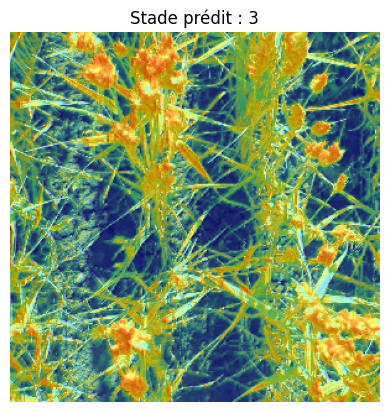

In [ ]:
# Lire l'image originale
img_cv = cv2.imread(img_path)
img_cv = cv2.resize(img_cv, (299, 299))  # Redimensionner l'image

# Redimensionner la carte thermique pour correspondre à la taille de l'image
heatmap_resized = cv2.resize(heatmap, (img_cv.shape[1], img_cv.shape[0]))
heatmap_resized = np.uint8(255 * heatmap_resized)
heatmap_resized = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)  # Appliquer un "jet" color map

# Superposer la carte thermique sur l'image
superimposed_img = cv2.addWeighted(img_cv, 0.6, heatmap_resized, 0.4, 0)

# Affichage du résultat
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title(f"Stade prédit : {predicted_class}")
plt.axis('off')
plt.show()


Gradient : Grad-CAM utilise les gradients de la sortie par rapport aux activations de la dernière couche convolutive pour voir quels pixels de l'image ont influencé la prédiction.